# Predict car CO2 emissions using historical data (Linear Regression)

## Import libraries

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Descriptive analysis

### Exploratory data analysis (EDA)

In [2]:
# Import data from CSV file
df = pd.read_csv('FuelConsumption.csv')

In [3]:
# Get 20 random samples of the dataset
df.sample(20) 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
135,2014,BMW,Z4 sDRIVE28i,TWO-SEATER,2.0,4,A8,Z,10.8,7.1,9.1,31,209
502,2014,HYUNDAI,ACCENT,COMPACT,1.6,4,A6,X,8.8,6.3,7.7,37,177
28,2014,AUDI,A7 QUATTRO,MID-SIZE,3.0,6,AS8,Z,13.1,8.8,11.2,25,258
760,2014,MERCEDES-BENZ,GLK 250 BLUETEC 4MATIC,SUV - SMALL,2.1,4,AS7,D,9.6,7.1,8.5,33,230
835,2014,NISSAN,370Z ROADSTER,TWO-SEATER,3.7,6,M6,Z,13.5,9.6,11.7,24,269
390,2014,FORD,F150 FFV 4X4,PICKUP TRUCK - STANDARD,5.0,8,AS6,E,22.4,16.9,19.9,14,318
744,2014,MERCEDES-BENZ,E 350 CABRIOLET,SUBCOMPACT,3.5,6,AS7,Z,12.0,8.5,10.4,27,239
832,2014,NISSAN,370Z,TWO-SEATER,3.7,6,AS7,Z,12.6,9.1,11.0,26,253
117,2014,BMW,ALPINA B7 xDRIVE SWB,FULL-SIZE,4.4,8,A8,Z,15.0,9.8,12.7,22,292
184,2014,CADILLAC,SRX AWD,SUV - STANDARD,3.6,6,AS6,X,14.8,10.4,12.8,22,294


In [4]:
# Display the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# Check the dataset for missing values
pd.isna(df).sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
# Check for unique values
df.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [7]:
# Sperate the independant variables from the dependant variable
co2_factors = df.drop(columns=['CO2EMISSIONS'])
co2_emissions = df['CO2EMISSIONS']

In [8]:
# Display samples for the independant variables (CO2 factors)
co2_factors.sample(20)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
397,2014,FORD,FLEX,SUV - STANDARD,3.5,6,AS6,X,13.2,9.4,11.5,25
456,2014,GMC,SIERRA,PICKUP TRUCK - STANDARD,5.3,8,A6,E,19.5,13.7,16.9,17
319,2014,DODGE,DART GT,MID-SIZE,2.4,4,A6,X,10.6,7.5,9.2,31
714,2014,MAZDA,MAZDA5,MINIVAN,2.5,4,M6,X,11.1,8.3,9.8,29
361,2014,FORD,EXPEDITION 4X4 FFV,SUV - STANDARD,5.4,8,A6,X,18.2,13.3,16.0,18
650,2014,LAND ROVER,RANGE ROVER V6 3.0 SC FFV,SUV - STANDARD,3.0,6,AS8,Z,14.1,10.1,12.3,23
196,2014,CHEVROLET,CORVETTE,TWO-SEATER,6.2,8,M7,Z,13.7,8.2,11.2,25
824,2014,MITSUBISHI,MIRAGE,COMPACT,1.2,3,AV,X,6.4,5.4,6.0,47
581,2014,JEEP,COMPASS 4X4,SUV - SMALL,2.4,4,A6,X,11.4,8.7,10.2,28
438,2014,GMC,SAVANA 1500 CARGO AWD,VAN - CARGO,5.3,8,A4,E,23.7,18.8,21.5,13


In [9]:
# Verify the shape of the resultant data
co2_emissions.shape, co2_factors.shape

((1067,), (1067, 12))

### Correlation detection

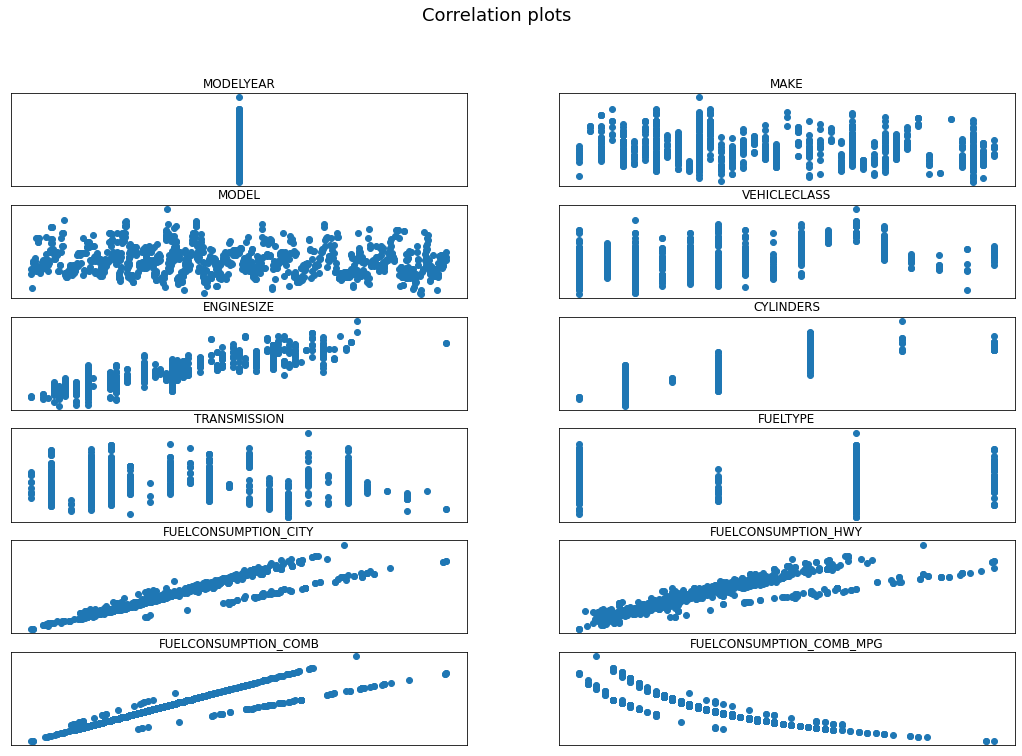

In [10]:
# Testing correlation between the co2_emissions variable and the CO2_factors variables using scatter plot 

# Creating a grid of two columns and 6 rows
fig_scatter, ax_scatter = plt.subplots(ncols=2,nrows=6,figsize=(18,12))

# The CO2_factor variable number in the dataset
factor_col_num = 0


for row in range(6):
    for col in range(2):
        ax_scatter[row,col].scatter(x=co2_factors.iloc[:,factor_col_num],y=co2_emissions)
        # Hidding the x and y ticks from plots
        ax_scatter[row,col].get_xaxis().set_visible(False)
        ax_scatter[row,col].get_yaxis().set_visible(False)
        # Set the title of plot as the name of CO2_factor variable
        ax_scatter[row,col].set_title(label=co2_factors.columns[factor_col_num])
        
        # Move to the next CO2_factor in the dataset
        factor_col_num += 1

fig_scatter.suptitle('Correlation plots',fontsize=18)
# Display figure
plt.show()

In [11]:
# Deprecating the MODEL YEAR variable as it has only one value across the entire dataset
df = df.drop(columns='MODELYEAR',axis=1)

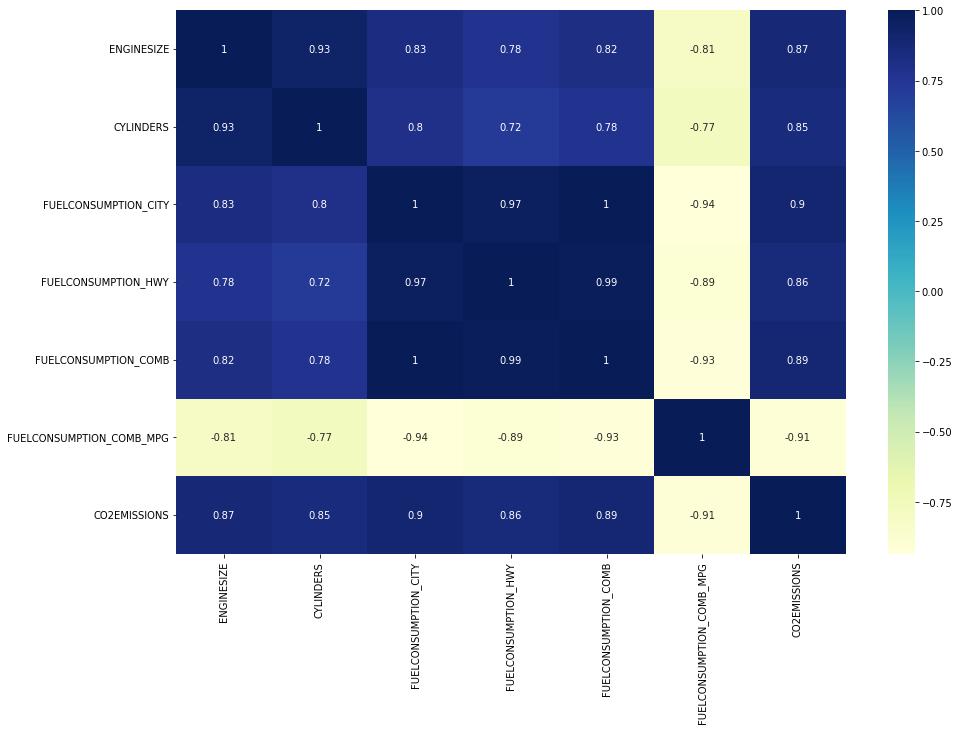

In [12]:
# Correlation heatmap
fig, ax = plt.subplots(figsize=(15,10))

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()

## Data processing

In [78]:
# Selecting high correlation variables
selected_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]

In [79]:
# Downscaling data using standardization
standardized_data = StandardScaler().fit_transform(selected_df)

In [80]:
# Splitting data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(standardized_data,co2_emissions,random_state=10)

In [81]:
print(f'Training set:{x_train.shape}, {y_train.shape}\nTesting set:{x_test.shape}, {y_test.shape}')

Training set:(800, 6), (800,)
Testing set:(267, 6), (267,)


## Modeling

In [82]:
# Instantiating a regression model
regressor = LinearRegression()

In [83]:
# Training model
regressor.fit(x_train,y_train)

LinearRegression()

In [84]:
# Predict using the testing set
y_predict = regressor.predict(x_test)

In [85]:
# Measuring the goodness of the model fit using the coefficient of determination
r2_score(y_predict,y_test)

0.8708115732004809

In [86]:
# Measuring the model accuracy using cross validation
regressor.score(x_test,y_test)

0.8953254999713555